# Loading and preprocessing data

In [73]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 37.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.2/30.2 MB 82.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [20]:
!pip install seaborn

In [61]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns


In [92]:
data = pd.read_csv("plant_growth_data.csv")

In [94]:
display(data)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [96]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [98]:
# data = data.dropna(axis=1)
# no null values, so not needed.

In [100]:
data = pd.get_dummies(data, columns = ["Soil_Type", "Water_Frequency", "Fertilizer_Type"], drop_first = True) 

In [102]:
display(data)

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_none,Fertilizer_Type_organic
0,5.192294,31.719602,61.591861,0,True,False,False,False,False,False
1,4.033133,28.919484,52.422276,1,False,True,False,True,False,True
2,8.892769,23.179059,44.660539,0,True,False,False,False,True,False
3,8.241144,18.465886,46.433227,0,True,False,False,False,True,False
4,8.374043,18.128741,63.625923,0,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
188,5.652000,28.000000,70.200000,0,False,True,True,False,True,False
189,7.528000,30.500000,60.100000,1,False,False,False,True,False,False
190,4.934000,24.500000,61.700000,0,True,False,False,False,True,False
191,8.273000,27.900000,69.500000,1,False,True,True,False,False,True


<Axes: >

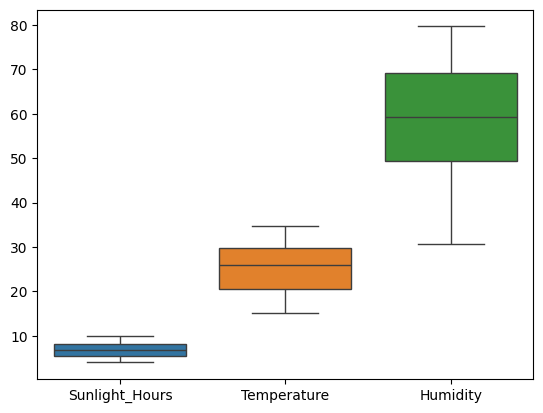

In [116]:
numeric_cols = ["Sunlight_Hours", "Temperature", "Humidity"]
sns.boxplot(data=data[numeric_cols])

array([[<Axes: title={'center': 'Sunlight_Hours'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Growth_Milestone'}>]], dtype=object)

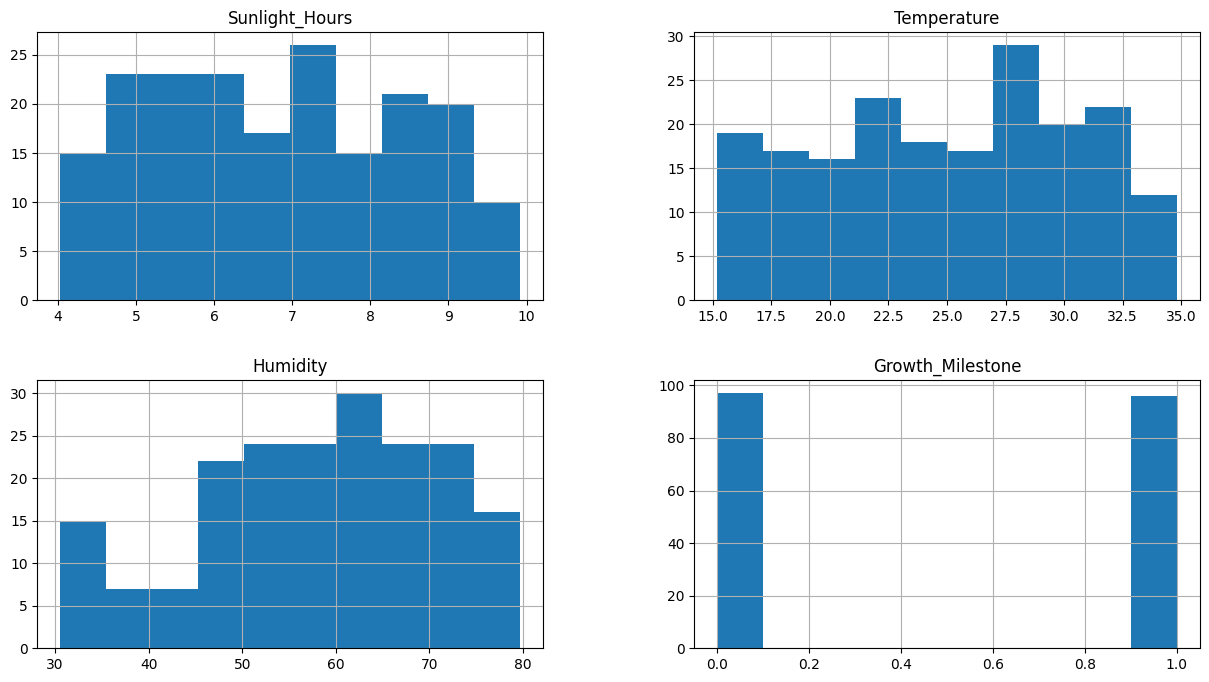

In [122]:
data.hist(figsize=(15, 8))

In [124]:
data.corr()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_none,Fertilizer_Type_organic
Sunlight_Hours,1.000000,-0.100628,-0.052482,-0.122212,-0.180748,-0.027667,-0.114460,0.160820,0.092041,-0.009391
Temperature,-0.100628,1.000000,0.117648,-0.053577,-0.023218,0.000030,0.090385,-0.061148,0.090451,0.074400
Humidity,-0.052482,0.117648,1.000000,-0.130328,-0.062929,0.003479,-0.002924,0.081276,-0.023958,0.050469
Growth_Milestone,-0.122212,-0.053577,-0.130328,1.000000,0.092334,-0.018362,0.025399,-0.007809,-0.315610,0.257165
Soil_Type_loam,-0.180748,-0.023218,-0.062929,0.092334,1.000000,-0.484569,-0.086082,-0.119302,0.005203,0.090293
Soil_Type_sandy,-0.027667,0.000030,0.003479,-0.018362,-0.484569,1.000000,0.236789,-0.109047,0.033073,-0.071265
Water_Frequency_daily,-0.114460,0.090385,-0.002924,0.025399,-0.086082,0.236789,1.000000,-0.523258,0.013741,0.078228
Water_Frequency_weekly,0.160820,-0.061148,0.081276,-0.007809,-0.119302,-0.109047,-0.523258,1.000000,0.031880,-0.012722
Fertilizer_Type_none,0.092041,0.090451,-0.023958,-0.315610,0.005203,0.033073,0.013741,0.031880,1.000000,-0.491509
Fertilizer_Type_organic,-0.009391,0.074400,0.050469,0.257165,0.090293,-0.071265,0.078228,-0.012722,-0.491509,1.000000


In [126]:
# Squared terms
data["Temperature^2"] = data["Temperature"] ** 2
data["Humidity^2"] = data["Humidity"] ** 2
data["Sunlight_Hours^2"] = data["Sunlight_Hours"] ** 2

# Interaction terms
data["Temperature*Humidity"] = data["Temperature"] * data["Humidity"]
data["Temperature*Sunlight_Hours"] = data["Temperature"] * data["Sunlight_Hours"]
data["Humidity*Sunlight_Hours"] = data["Humidity"] * data["Sunlight_Hours"]


In [130]:
display(data)

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_none,Fertilizer_Type_organic,Temperature^2,Humidity^2,Sunlight_Hours^2,Temperature*Humidity,Temperature*Sunlight_Hours,Humidity*Sunlight_Hours
0,5.192294,31.719602,61.591861,0,True,False,False,False,False,False,1006.133177,3793.557293,26.959918,1953.669330,164.697504,319.803054
1,4.033133,28.919484,52.422276,1,False,True,False,True,False,True,836.336562,2748.095031,16.266159,1516.025181,116.636117,211.425996
2,8.892769,23.179059,44.660539,0,True,False,False,False,True,False,537.268771,1994.563707,79.081333,1035.189254,206.126006,397.155834
3,8.241144,18.465886,46.433227,0,True,False,False,False,True,False,340.988961,2156.044595,67.916455,857.430700,152.180030,382.662915
4,8.374043,18.128741,63.625923,0,False,True,False,False,False,True,328.651245,4048.258053,70.124596,1153.457866,151.810856,532.806214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,28.000000,70.200000,0,False,True,True,False,True,False,784.000000,4928.040000,31.945104,1965.600000,158.256000,396.770400
189,7.528000,30.500000,60.100000,1,False,False,False,True,False,False,930.250000,3612.010000,56.670784,1833.050000,229.604000,452.432800
190,4.934000,24.500000,61.700000,0,True,False,False,False,True,False,600.250000,3806.890000,24.344356,1511.650000,120.883000,304.427800
191,8.273000,27.900000,69.500000,1,False,True,True,False,False,True,778.410000,4830.250000,68.442529,1939.050000,230.816700,574.973500


In [132]:
import matplotlib.pyplot as plt

<Axes: >

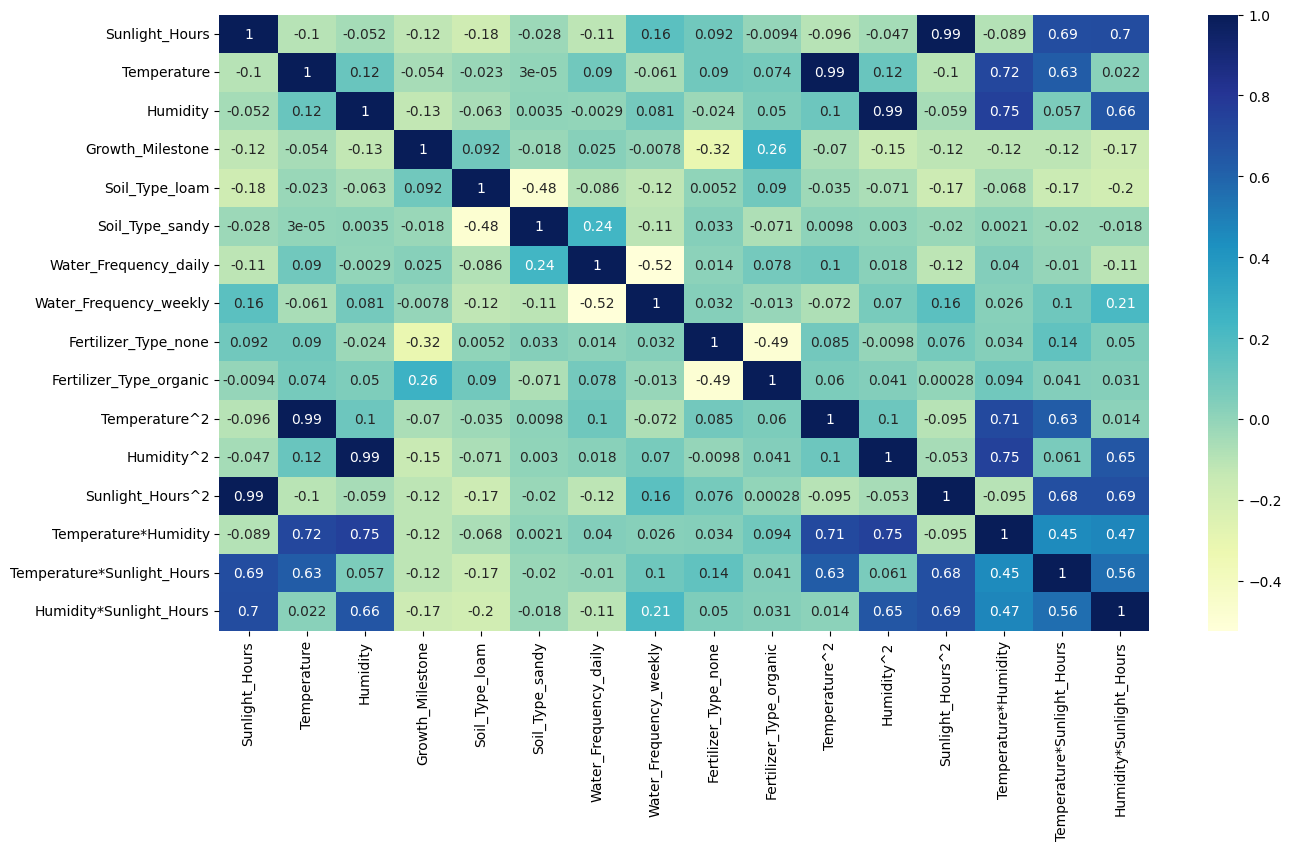

In [134]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

## Creating the training and testing split for model training

In [150]:
from sklearn.model_selection import train_test_split

x = data.drop(["Growth_Milestone"], axis=1)
y = data["Growth_Milestone"]


In [284]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=True)

array([[<Axes: title={'center': 'Sunlight_Hours'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Growth_Milestone'}>,
        <Axes: title={'center': 'Temperature^2'}>,
        <Axes: title={'center': 'Humidity^2'}>],
       [<Axes: title={'center': 'Sunlight_Hours^2'}>,
        <Axes: title={'center': 'Temperature*Humidity'}>,
        <Axes: title={'center': 'Temperature*Sunlight_Hours'}>],
       [<Axes: title={'center': 'Humidity*Sunlight_Hours'}>, <Axes: >,
        <Axes: >]], dtype=object)

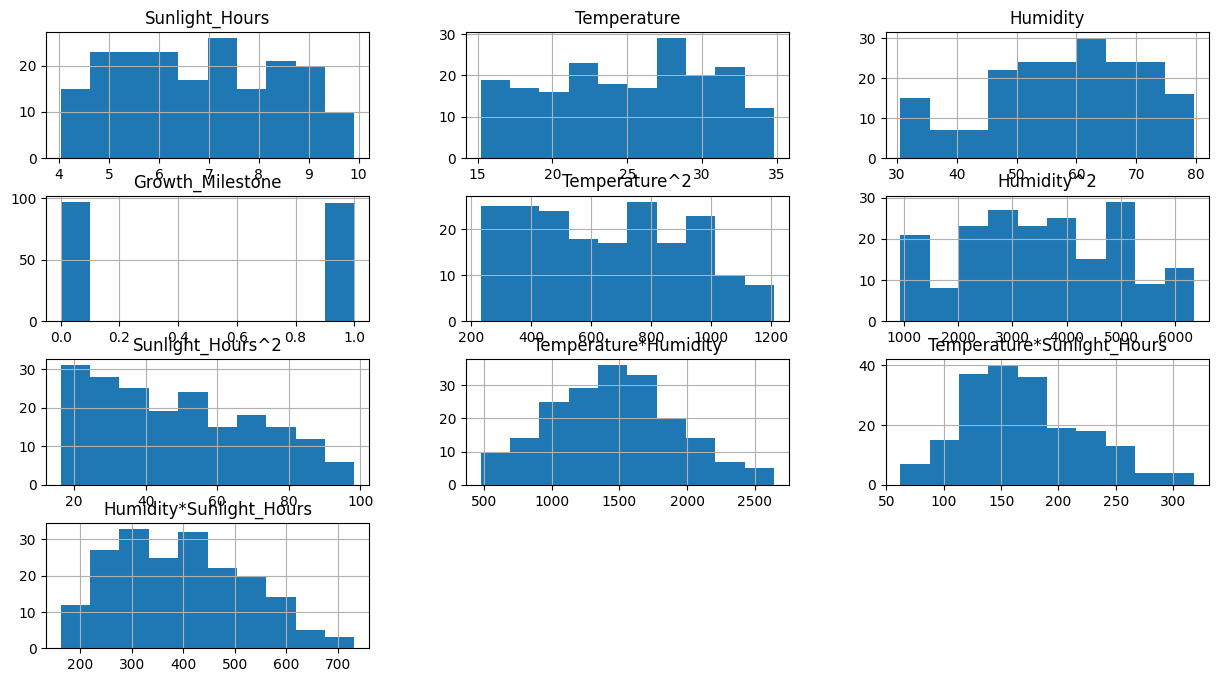

In [286]:
data.hist(figsize=(15, 8))

In [287]:
data.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Temperature^2,Humidity^2,Sunlight_Hours^2,Temperature*Humidity,Temperature*Sunlight_Hours,Humidity*Sunlight_Hours
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409,657.328717,3534.220892,49.146060,1464.809376,170.324193,395.556536
std,1.599509,5.354170,12.631799,0.501294,265.391751,1421.164237,22.162860,465.917863,52.466578,125.057822
min,4.033133,15.200000,30.567682,0.000000,231.040000,934.383197,16.266159,474.723020,62.098639,162.268041
25%,5.477000,20.637095,49.300000,0.000000,425.889710,2430.490000,29.997529,1121.049100,132.288600,300.366361
50%,6.833290,25.912336,59.182806,0.000000,671.449146,3502.604478,46.693846,1496.400000,163.675435,389.017400
75%,8.241144,29.757938,69.100000,1.000000,885.534894,4774.810000,67.916455,1753.360000,207.491200,490.638400
max,9.913903,34.810103,79.648240,1.000000,1211.743260,6343.842104,98.285467,2642.359891,318.160486,732.389279


In [290]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [292]:
model.score(x_test, y_test)

0.06789525559583842

In [294]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)
print("Accuracy:", model.score(x_test_scaled, y_test))

Accuracy: 0.5384615384615384


In [296]:
y.value_counts(normalize=True)


Growth_Milestone
0    0.502591
1    0.497409
Name: proportion, dtype: float64

In [298]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test_scaled)))


              precision    recall  f1-score   support

           0       0.41      0.47      0.44        15
           1       0.64      0.58      0.61        24

    accuracy                           0.54        39
   macro avg       0.52      0.53      0.52        39
weighted avg       0.55      0.54      0.54        39



In [300]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(x_train_scaled, y_train)
print("Random Forest Accuracy:", rf.score(x_test_scaled, y_test))



Random Forest Accuracy: 0.7948717948717948


In [314]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 1. Define your base model
rf = RandomForestClassifier(random_state=0)

# 2. Create a dictionary of hyperparameters to try
param_grid = {
    'n_estimators': [50, 100, 150, 200],         # Number of trees in the forest
    'max_depth': [10, 20, 30, None],             # Limit how deep each tree grows
    'min_samples_split': [2, 5, 10],             # Min samples needed to split a node
    'min_samples_leaf': [1, 2, 4, 6]             # Min samples at a leaf node
}

# 3. Set up the GridSearch with Cross-Validation
grid_search = GridSearchCV(estimator=rf,        # The model you're tuning
                           param_grid=param_grid, # The parameters to try
                           cv=5,                 # 5-fold cross-validation
                           scoring='accuracy',   # Metric to optimize
                           verbose=0,            # To see the process
                           n_jobs=-1)            # Use all available cores

# 4. Fit it to your scaled training data
grid_search.fit(x_train_scaled, y_train)

# 5. Print the best results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# 6. Evaluate on the test set
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(x_test_scaled, y_test)
print("Test Accuracy with Best Model:", test_accuracy)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.6036559139784947
Test Accuracy with Best Model: 0.717948717948718


### "The initial Random Forest achieved 79% test accuracy, but after hyperparameter tuning with GridSearchCV, the best model achieved 71.8%. The latter is more reliable due to cross-validation."